<a href="https://colab.research.google.com/github/treep1/Keras-Deep-learning/blob/master/IMDB_CNN%2BLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMDB dataset & CNN + LSTM
##IMDB
IMDB는 Internet Movie DataBase, 즉 영화리뷰 데이터를 말한다. 총 5만개의 리뷰로 이루어져 있고,  훈련 데이터와 검증데이터를 각각 25000개씩 나누어있고, 각각 50대50의 긍정리뷰와 부정리뷰를 가지고 있다.
##CNN + LSTM (RCNN)
DCNN이 컴퓨터 비전 문제에서 대단한 역할이다. 하지만 시각에 대한 안정성은 독립적인 것이 아닌 시간에 따라 발생하는 것이기 때문에, 시계열 데이터에 대한 연속적 예측이 필요하므로, 네트워크 구조가 이미지에서 시계열을 인식하도록 설계된 새로운 신경망 모델인 RCNN이 탄생하게 되었다.

RCNN은 시계열 label 생성이 가능하고, 단어 인식하는 측면에서 이전의 모델들 보다 훨씬 우수한 성능을 보유하고 있다, 또한 DCNN보다 훨씬 적은 매개변수를 필요로 하기 때문에, 차지하는 저장공간이 줄어들어서 효율적이다.



In [0]:
%matplotlib inline
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.layers import LSTM
from distutils.version import LooseVersion as LV
from keras import __version__
from keras import backend as K

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

print('Using Keras version:', __version__, 'backend:', K.backend())
assert(LV(__version__) >= LV("2.0.0"))
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
from keras.datasets import imdb
import numpy as np

Using Keras version: 2.2.4 backend: tensorflow


In [0]:
imdb = keras.datasets.imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=20000)



In [0]:
x_val = x_train[20000:]
y_val = y_train[20000:]
x_train  = x_train[:20000]
y_train = y_train[:20000]


In [0]:
x_train = sequence.pad_sequences(x_train, maxlen = 200)
x_val = sequence.pad_sequences(x_val, maxlen = 200)
x_test = sequence.pad_sequences(x_test, maxlen = 200)


In [0]:


model = Sequential()
model.add(Embedding(20000, 128))
model.add(Dropout(0.2))
model.add(Conv1D(256, 3, padding = 'valid', activation = 'relu', strides = 1))
model.add(MaxPooling1D(pool_size = 4))
model.add(LSTM(128))
model.add(Dense(1, activation = 'sigmoid'))

W0804 20:42:16.061909 140282382993280 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



##Embedding 
Embedding은 범주형 자료를 연속적 벡터 형태로 변환시키는 것을 말한다.
단어를 n차원의 벡터로 매핑시켜준다

##Dropout
 망의 크기가 커질 경우, Overfitting의 문제를 해결하기 위해서, 망에 있는 모든 layer를 학습 시키는 것이 아닌, 같은 망에 있는 입력 레이어나 히든 레이어의 일부 뉴런을 생략하고 줄여 효율적인 신경망 학습을 수행하도록 해준다.
##Conv1D
합성곱(Convolution) 연산을 수행하는 역할을 한다.
1차원 상에서 CNN의 중요 레이어중 하나인 Convolutional 레이어의 연산을 수행해준다.
##MaxPooling1D
Pooling이란, Conv연산을 거쳐서 나온 activation maps가 있을 때, 이를 이루는 Conv 레이어를 resizing하여 새로운 레이어를 얻는다. 
MaxPooling은 최댓값을 뽑아내준다.

##LSTM
LSTM 유닛은 셀과 게이트로 이루어져있고, 셀은 셀의 연결된 게이트 값을 바탕으로 무엇을 저장할 지, 언제 정보를 보낼지, 언제쓰고 언제 지울지를 결정한다.LSTM은 음악의 다양한 리듬, 글의 다양한 주제, 주식시장의 각종 요인등 여러가지 요인들을 잘 잡아낸다.

In [18]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs = 25, batch_size = 64, validation_data = (x_val, y_val))

W0804 20:43:54.664704 140282382993280 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0804 20:43:54.770994 140282382993280 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0804 20:43:54.795260 140282382993280 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 366s 18ms/step - loss: 0.3961 - acc: 0.8086 - val_loss: 0.2961 - val_acc: 0.8752
Epoch 2/25
20000/20000 [==============================] - 358s 18ms/step - loss: 0.1840 - acc: 0.9319 - val_loss: 0.3041 - val_acc: 0.8772
Epoch 3/25
20000/20000 [==============================] - 366s 18ms/step - loss: 0.0905 - acc: 0.9695 - val_loss: 0.3698 - val_acc: 0.8654
Epoch 4/25
20000/20000 [==============================] - 362s 18ms/step - loss: 0.0504 - acc: 0.9839 - val_loss: 0.4589 - val_acc: 0.8680
Epoch 5/25
20000/20000 [==============================] - 363s 18ms/step - loss: 0.0282 - acc: 0.9908 - val_loss: 0.5157 - val_acc: 0.8622
Epoch 6/25
20000/20000 [==============================] - 365s 18ms/step - loss: 0.0241 - acc: 0.9922 - val_loss: 0.5247 - val_acc: 0.8474
Epoch 7/25
20000/20000 [==============================] - 363s 18ms/step - loss: 0.0214 - acc: 0.9936 - val_loss: 0.5

In [19]:
result = model.evaluate(x_test, y_test)



25000/25000 [==============================] - 35s 1ms/step


In [20]:
print("loss")
print(result[0])
print("accuracy")
print(result[1])


loss
0.9573472526168824
accuracy
0.83392


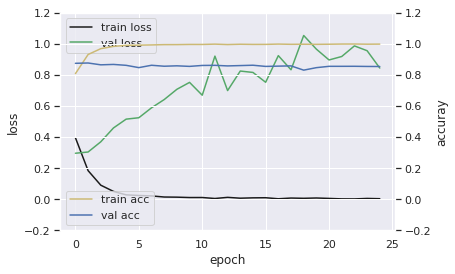

In [41]:


fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'k', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist.history['acc'], 'y', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'b', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()